# Fraudulent Job Posting Detection 

### Objective

The objective of this project is to perform Exploratory Data Analysis (EDA) to identify patterns and characteristics that distinguish real and fraudulent job postings. By analyzing factors such as employment type, telecommuting status, required education, experience, industry, and job function, the project aims to generate meaningful insights and recommendations that can help job platforms reduce fraud.

### About
This dataset is designed for the prediction of real or fake job postings, addressing the growing concern of fraudulent job descriptions in the online sphere. It contains a collection of 18,000 job descriptions and 18 columns.It utilised for identifying distinctive traits and features, such as specific words, entities, or phrases, that are characteristic of fraudulent job postings. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\hanna\Downloads\fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [5]:
df.shape

(17880, 18)

### Columns
Job ID: A unique identifier for each individual job posting.

Title: The advertised job title (e.g., 'Marketing Intern', 'Head of Content').

Location: Geographic details of the job, which may include 'Country', 'State', and 'City'.

Department: The specific department within the organisation where the role is situated.

Salary Range: The indicated remuneration for the position, typically an annual salary or hourly wage.

Company Profile: A descriptive overview of the hiring company.

Job Description: The detailed narrative of the role, encompassing responsibilities, qualifications, and benefits.

Requirements/Qualifications: Specific skills, prior experience, and educational background necessary for the role.

Employment Type: The nature of employment (e.g., 'Full-time', 'Part-time', 'Internship').

Experience Level: The required seniority or experience for the position (e.g., 'Entry-level', 'Mid-Senior level').

Education Required: The minimum educational qualification expected from candidates.

Industry: The sector in which the hiring company operates.

Function: The primary professional function of the role (e.g., 'Sales', 'Customer Service', 'Marketing').

Is Fake: A binary flag (e.g., 0 or 1) indicating whether the job posting is genuine or fraudulent, serving as the target variable for classification tasks

In [6]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [7]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Cleaning

In [9]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
threshold = 0.6 * len(df)
df = df.loc[:, df.isnull().sum() < threshold]

In [11]:
df.columns

Index(['job_id', 'title', 'location', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [12]:
df.drop(columns=['description', 'benefits','company_profile','requirements','has_company_logo','has_questions'], inplace=True)

In [13]:
cols = ['employment_type', 'required_experience', 'required_education','industry','function']
df[cols] = df[cols].fillna("Not Specified")

In [14]:
col ="location"
df[col]=df['location'].fillna("Unknown")

In [16]:
df.nunique()

job_id                 17880
title                  11231
location                3106
telecommuting              2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
dtype: int64

## Exploratory Data Analysis (EDA)

In [15]:
df.isna().sum()

job_id                 0
title                  0
location               0
telecommuting          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [5]:
df['fraud_label'] = df['fraudulent'].map({0: 'Real', 1: 'Fake'})
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,fraud_label
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,Real
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,Real
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,Real
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Real
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,Real
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,Real
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,Real
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,Real


### 1️⃣ Univariate Analysis

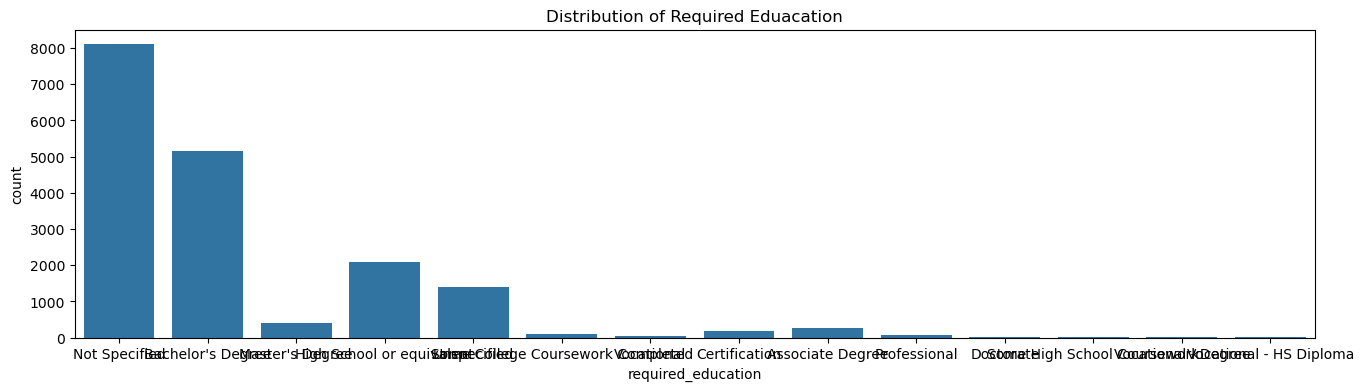

In [41]:
plt.figure(figsize=(16,4))
sns.countplot(x=df['required_education'])
plt.title("Distribution of Required Eduacation")
plt.show()

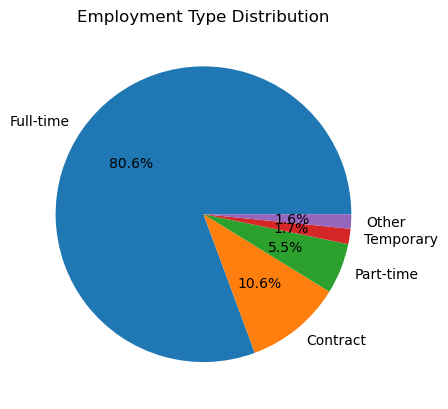

In [6]:
employment_counts = df['employment_type'].value_counts()
sns.color_palette('pastel')
plt.pie(x=employment_counts.values, labels=employment_counts.index, autopct='%1.1f%%')
plt.title("Employment Type Distribution")
plt.show()

### 2️⃣ Bivariate Analysis

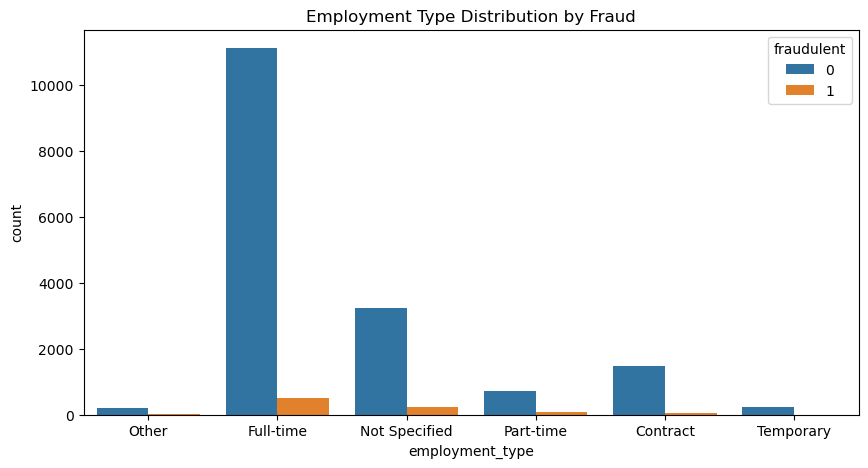

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x="employment_type", hue="fraudulent", data=df)
plt.title("Employment Type Distribution by Fraud")
plt.show()

#### Insight = 'Full time' or 'Not specified' have higher scam rate

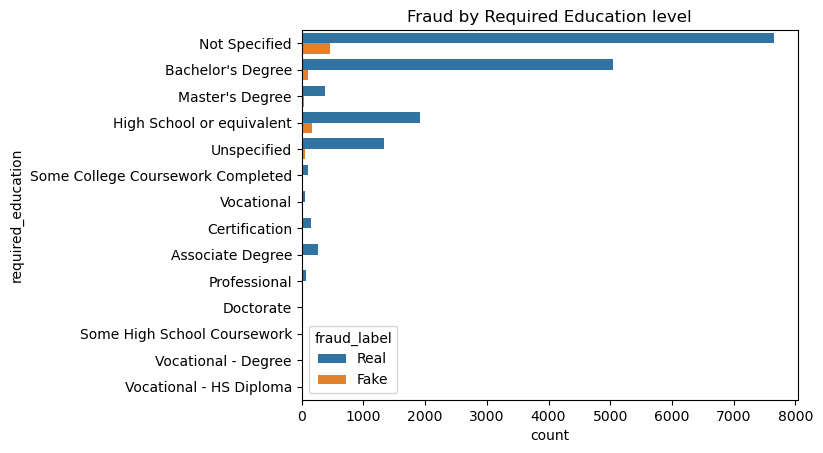

In [21]:
sns.countplot(y="required_education",hue="fraud_label",data=df)
plt.title("Fraud by Required Education level")
plt.show()

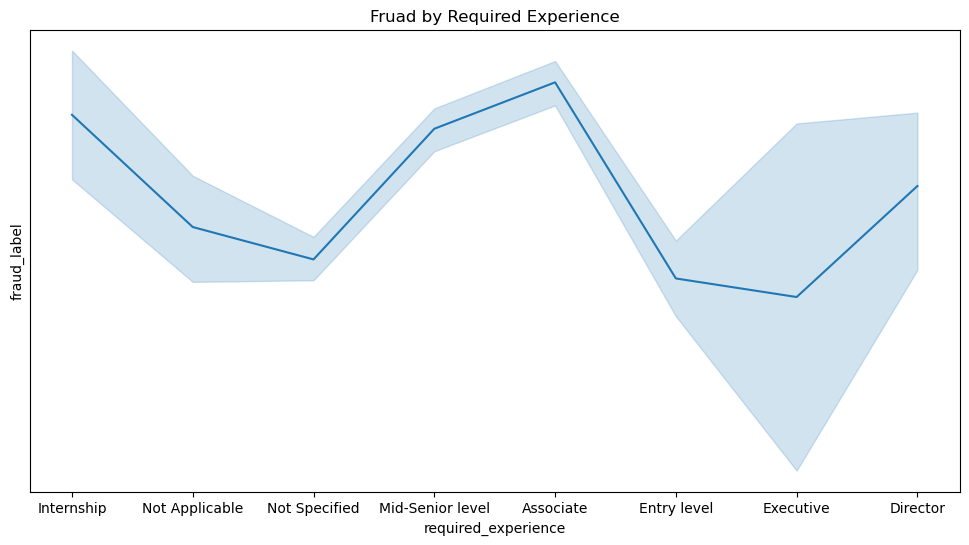

In [38]:
plt.figure(figsize=(12,6))
sns.lineplot(x="required_experience",y="fraud_label",data=df)
plt.title("Fruad by Required Experience")
plt.show()

#### Insights = Fake job posting often blank these requirments

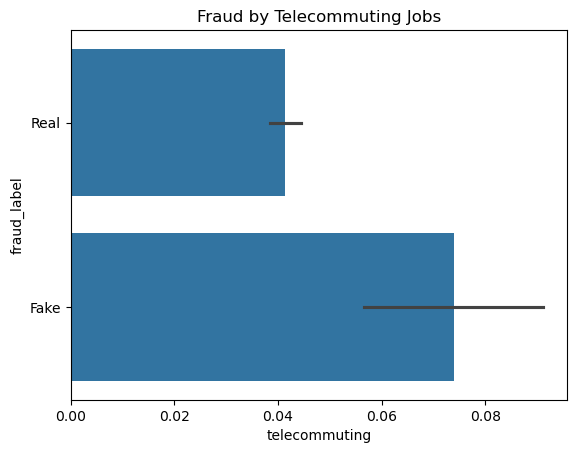

In [23]:
sns.barplot(x="telecommuting",y="fraud_label",data=df)
plt.title("Fraud by Telecommuting Jobs")
plt.show()

#### Instght = Higher in scam posting

In [24]:
fraud_rate = df.groupby("function")["fraudulent"].mean().sort_values(ascending=False)

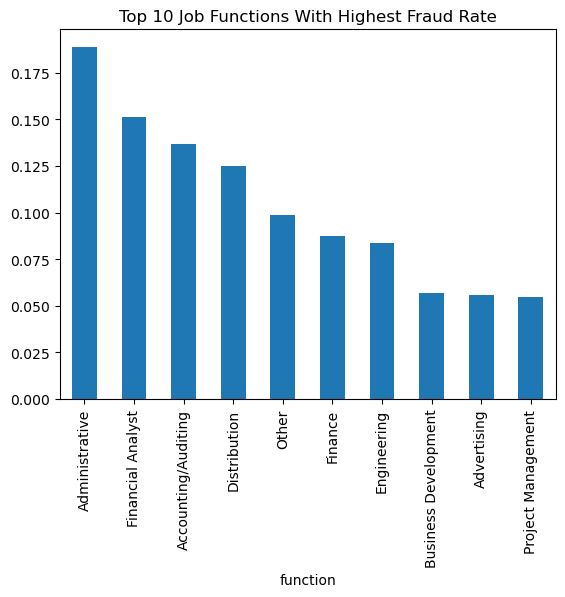

In [25]:
fraud_rate.head(10).plot(kind='bar')
plt.title("Top 10 Job Functions With Highest Fraud Rate")
plt.show()

#### Insight = Administrative and Financial analyst job functions have highest fraud rate.

In [26]:
fraud_rate_by_industry = df.groupby("industry")["fraudulent"].mean().sort_values(ascending=False)

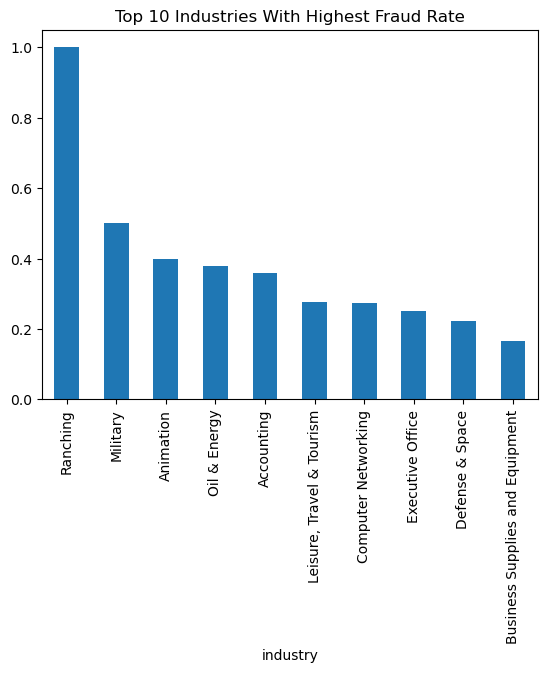

In [27]:
fraud_rate_by_industry.head(10).plot(kind='bar')
plt.title("Top 10 Industries With Highest Fraud Rate")
plt.show()

#### Insight = Ranching and military show higher fraud rate

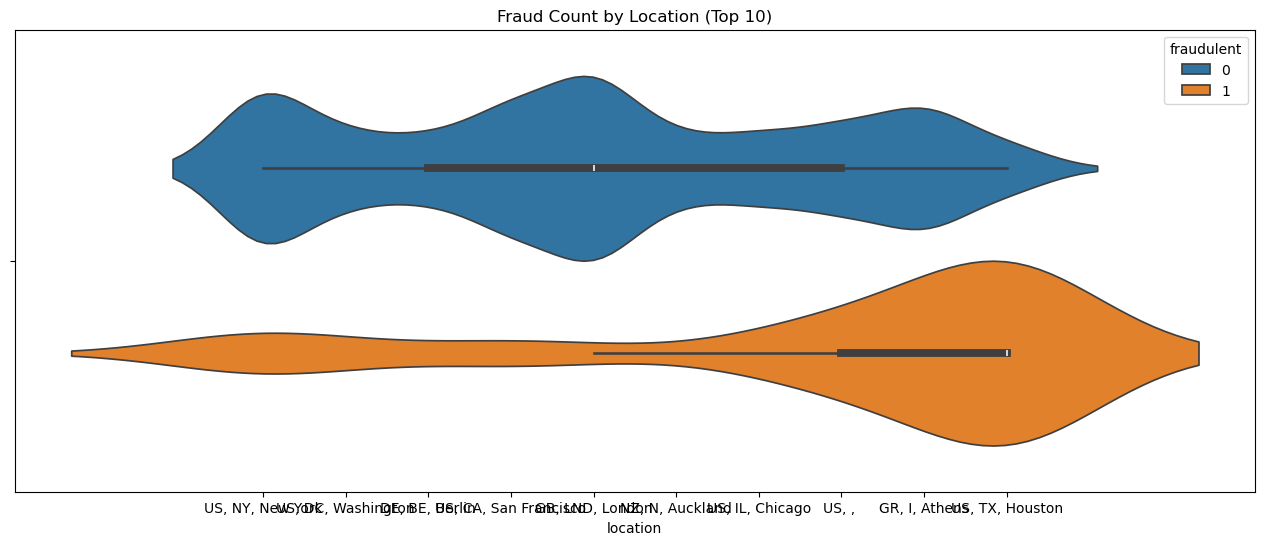

In [7]:
top_locations = df['location'].value_counts().head(10).index
plt.figure(figsize=(16,6))
sns.violinplot(data=df[df['location'].isin(top_locations)],
              x="location", hue="fraudulent")
plt.title("Fraud Count by Location (Top 10)")
plt.show()

In [1]:
trend = df.groupby("employment_type")["fraudulent"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=trend, x="employment_type", y="fraudulent")
plt.title("Fraud Trend by Employment Type")
plt.show()


NameError: name 'df' is not defined

### 3️⃣ Multivariate Analysis

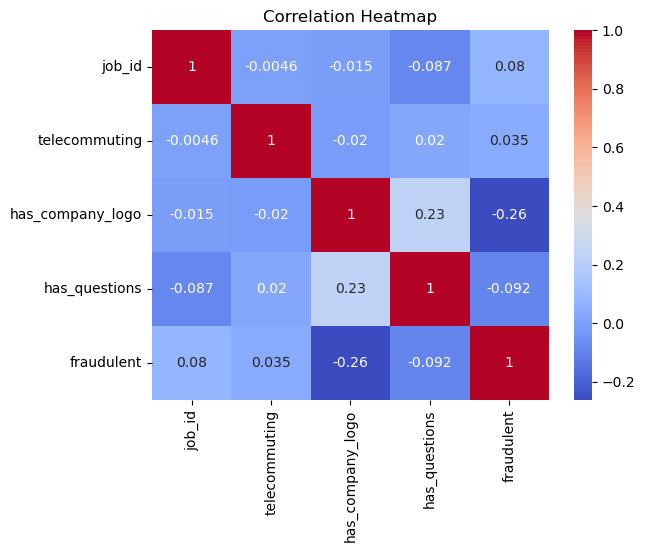

In [8]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

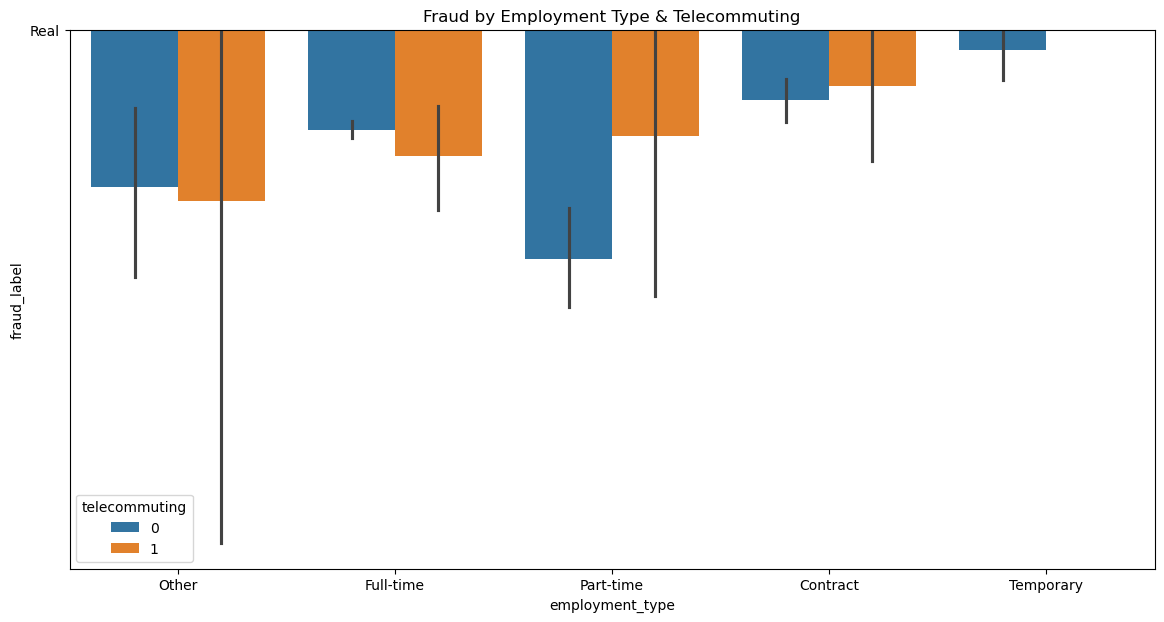

In [11]:
plt.figure(figsize=(14,7))
sns.barplot(data=df, x="employment_type", y="fraud_label", hue="telecommuting")
plt.title("Fraud by Employment Type & Telecommuting")
plt.show()

#### Insight = 'Not specified' employment type & remote works have higher fraud rate

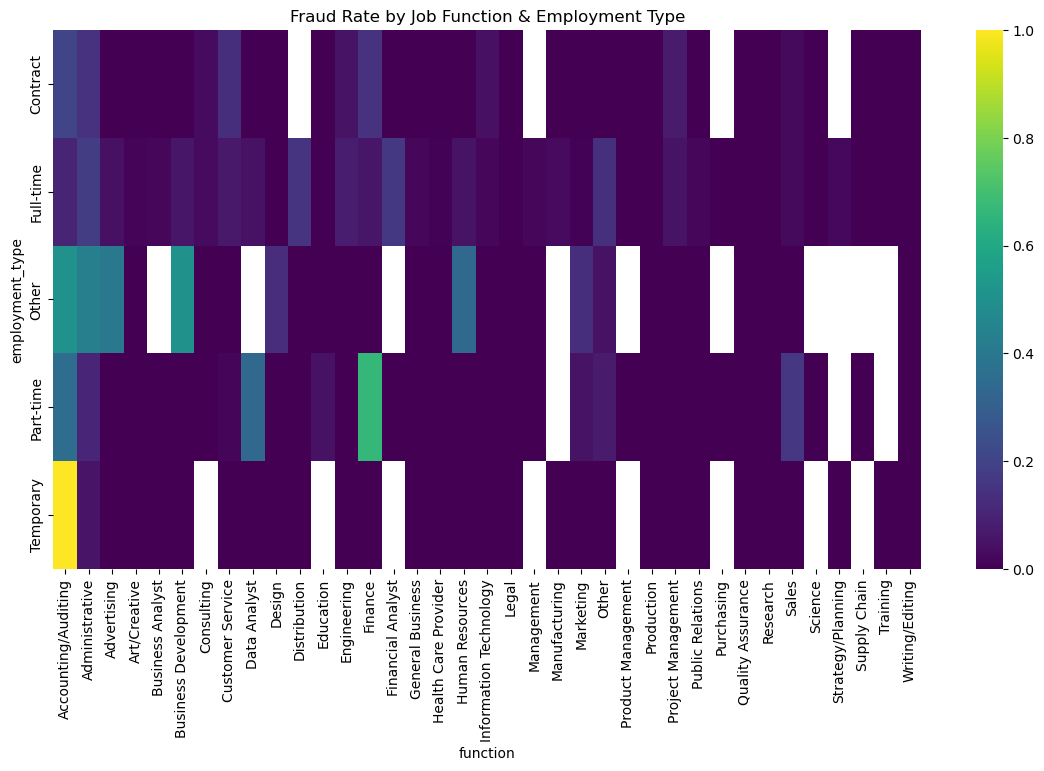

In [12]:
pivot = df.pivot_table(values="fraudulent",
                       index="employment_type",
                       columns="function",
                       aggfunc="mean")
plt.figure(figsize=(14,7))
sns.heatmap(pivot, cmap="viridis")
plt.title("Fraud Rate by Job Function & Employment Type")
plt.show()

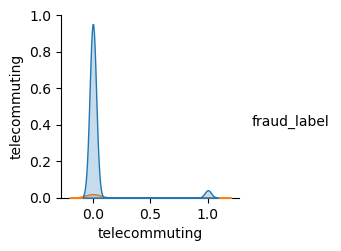

In [13]:
company_cols = ['employment_type', 'telecommuting', 'fraud_label']

sns.pairplot(df[company_cols], 
             hue='fraud_label')
plt.show()

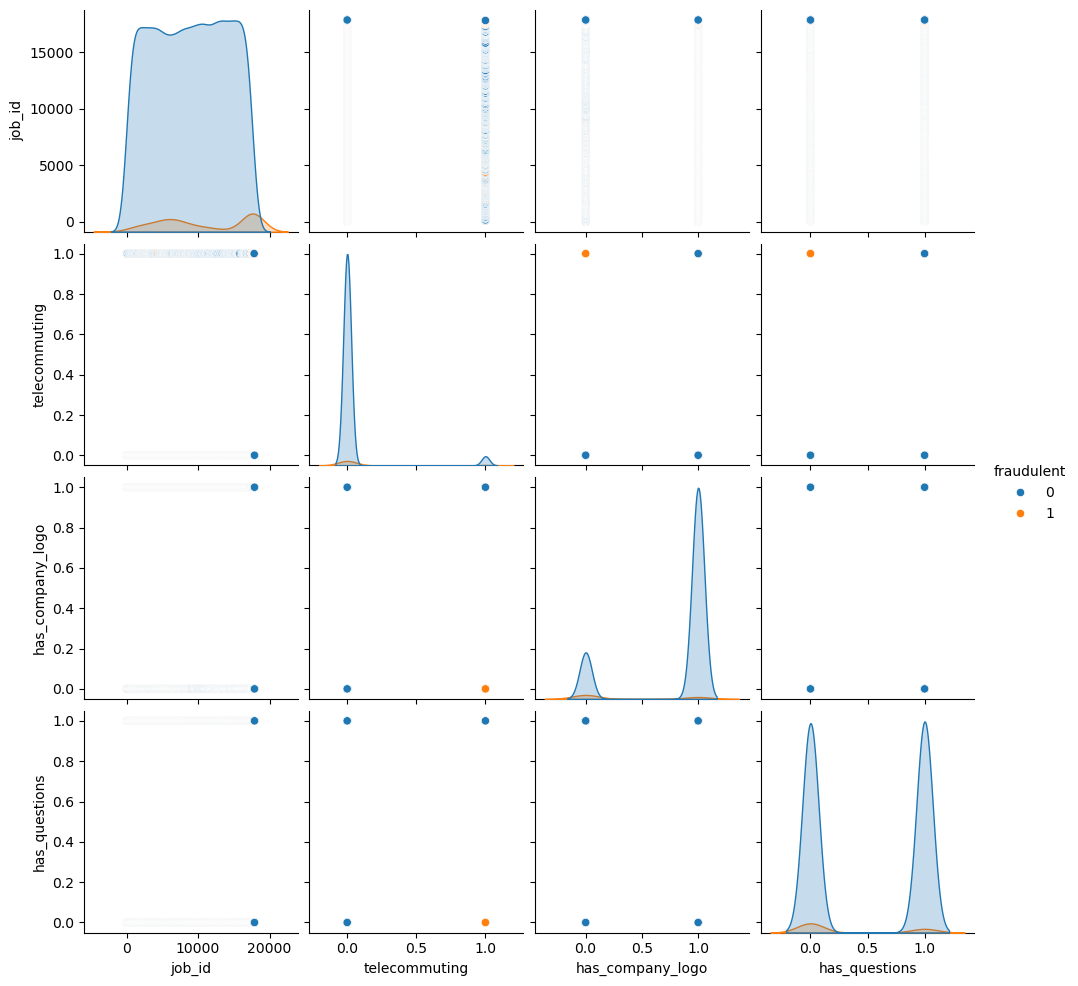

In [14]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
sns.pairplot(df[num_cols], 
             hue='fraudulent')
plt.show()


### Target Variable

In [ ]:
sns.countplot(x=df['fraudulent'])
plt.title("Fraud vs Real Job Posts")
plt.show()

#### Insight = Majority of job posting is real!!

## INSIGHTS
| Feature               | Pattern in Fraudulent Posts                        |
| --------------------- | -------------------------------------------------- |
| required_education    | Often missing                                      |
| required_experience   | Often blank                                        |
| telecommuting         | Higher in scam posting                             |
| Job Functions         | Administrative and Financial analyst have higher   |
| Industries            | Ranching and military show higher scam             |
|  Employment type       | Full time or not specified have higher scam rate  |

## 📊 Overall Project Insights
🔹 1. Fraudulent job postings are a minority but highly patterned

Although fraudulent jobs form a smaller portion of the dataset, they show strong and repeatable patterns across multiple attributes such as employment type, telecommuting, education level, and job function.

🔹 2. Remote (telecommuting) jobs show a higher fraud risk

Visualizations reveal that telecommuting job postings have a significantly higher fraud rate compared to on-site roles.
This suggests scammers prefer remote listings due to easier reach and lower verification barriers.

🔹 3. Missing or vague experience & education requirements are red flags

Jobs with “Not Specified” or unclear required experience and education levels show noticeably higher fraud rates.
Legitimate employers usually provide clear qualification details.

🔹 4. Certain job functions are more fraud-prone

Fraud rates are higher in roles related to:

Customer Service

Administrative / Entry-level roles

Marketing & Sales

These roles typically attract a large applicant pool, making them attractive targets for fraudsters.

🔹 5. Industry concentration highlights fraud hotspots

A small number of industries contribute disproportionately to fraudulent postings.
This indicates fraud is industry-concentrated rather than evenly distributed.

🔹 6. Location patterns suggest non-random behavior

Fraudulent postings are clustered in certain locations or use generic location names, indicating attempts to appear broad or anonymous.

## RECOMMENDATIONS
• Flag postings missing company details or proper descriptions. 

• Add stricter verification for telecommuting roles.

• Use automated rules leveraging text length and missing field patterns. 